## Importing Necessary Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor

## Loading the dataset 

In [112]:
df_original = pd.read_csv('/home/soumya/Documents/Win-Factor-Soumya/submissions/soumya_jhunjhunwala/week2/mw_pw_profiles.csv', low_memory = False)

In [113]:
df_original.columns

Index(['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date',
       'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out',
       'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken',
       'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind',
       'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded',
       'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_score_bowling',


## Dropping Unnecessary columns :

In [114]:
df_original.drop(['gender', 'balls_per_over', 'series_name', 'name_x', 'name_y', 'unique_name','key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams', ], axis = 1, inplace = True)

In [115]:
df_original.columns

Index(['player_id', 'match_id', 'start_date', 'match_type', 'runs_scored',
       'player_out', 'balls_faced', 'fours_scored', 'sixes_scored',
       'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done',
       'out_kind', 'dot_balls_as_batsman', 'order_seen', 'balls_bowled',
       'runs_conceded', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team',
       'fantasy_score_batting', 'fantasy_score_bowling',
       'fantasy_score_total'],
      dtype='object')

In [116]:
df_original.head()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,00015688,1158348,2018-08-21,T20,10,1,30,1,0,1,...,0,0,0,0,0,Sierra Leone,Namibia,5,8,17
1,00015688,1182644,2019-05-05,T20,8,1,18,1,0,0,...,0,0,0,0,0,Sierra Leone,Uganda,3,0,7
2,00015688,1275107,2021-09-09,T20,1,0,5,0,0,0,...,0,0,0,0,0,Sierra Leone,Nigeria,1,0,5
3,00015688,1275113,2021-09-15,T20,0,0,0,0,0,0,...,0,0,0,0,0,Sierra Leone,Cameroon,0,0,4
4,00015688,1275125,2021-09-14,T20,1,1,15,0,0,0,...,0,0,0,0,0,Sierra Leone,Uganda,-5,0,-1


## Checking for null values

In [117]:
df_original.isnull().sum()

player_id                0
match_id                 0
start_date               0
match_type               0
runs_scored              0
player_out               0
balls_faced              0
fours_scored             0
sixes_scored             0
catches_taken            0
run_out_direct           0
run_out_throw            0
stumpings_done           0
out_kind                 0
dot_balls_as_batsman     0
order_seen               0
balls_bowled             0
runs_conceded            0
wickets_taken            0
bowled_done              0
lbw_done                 0
maidens                  0
dot_balls_as_bowler      0
player_team              0
opposition_team          0
fantasy_score_batting    0
fantasy_score_bowling    0
fantasy_score_total      0
dtype: int64

## Sorting the dataset according to start_date

In [118]:
df_original['start_date'] = pd.to_datetime(df_original['start_date'], errors='coerce')

df_original.sort_values(by=['start_date'], inplace=True)
df_original.reset_index(drop=True, inplace=True)

In [119]:
df_original.head()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
0,f44af07f,63963,2001-12-19,Test,39,1,93,6,0,0,...,0,0,0,2,39,England,India,45,0,49
1,de8cce37,63963,2001-12-19,Test,12,1,18,2,0,1,...,0,0,0,0,0,India,England,14,8,26
2,b6cd714f,63963,2001-12-19,Test,4,1,16,0,0,0,...,4,0,1,5,96,India,England,4,76,84
3,725529bc,63963,2001-12-19,Test,0,1,3,0,0,0,...,0,0,0,3,70,India,England,-4,0,0
4,0184dc35,63963,2001-12-19,Test,3,1,61,0,0,1,...,0,0,0,0,0,India,England,3,14,21


In [120]:
df_original.tail()

,player_id,match_id,start_date,match_type,runs_scored,player_out,balls_faced,fours_scored,sixes_scored,catches_taken,...,wickets_taken,bowled_done,lbw_done,maidens,dot_balls_as_bowler,player_team,opposition_team,fantasy_score_batting,fantasy_score_bowling,fantasy_score_total
416707,4e38a3d6,1485778,2025-05-20,T20,4,1,10,0,0,0,...,0,0,0,0,0,Nepal,Thailand,-2,0,2
416708,bd36bc39,1485778,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,8,Thailand,Nepal,0,16,20
416709,f6ddfe08,1485778,2025-05-20,T20,0,0,0,0,0,1,...,0,0,0,0,10,Thailand,Nepal,0,12,16
416710,a2f46292,1473500,2025-05-20,T20,0,0,0,0,0,0,...,0,0,0,0,6,Chennai Super Kings,Rajasthan Royals,0,-4,0
416711,97e6e41a,1485778,2025-05-20,T20,24,0,33,1,0,0,...,0,0,0,0,10,Nepal,Thailand,25,0,29


## Feature Engineering

In [121]:
df_features = df_original.copy()

In [122]:
label_encoder = preprocessing.LabelEncoder()
df_features['player_id']= label_encoder.fit_transform(df_features['player_id'])
df_features['player_team']= label_encoder.fit_transform(df_features['opposition_team'])

In [123]:
df_features.drop(['match_id'], inplace=True, axis=1)

In [124]:
df_features.drop(['out_kind'],inplace = True, axis = 1)

In [125]:
df_features = pd.get_dummies(df_features, columns = ['match_type'], drop_first = True, dtype = int)

In [126]:
df_features['strike_rate'] = (df_features['runs_scored'] / df_features['balls_faced'])*100

In [127]:
df_features['economy_rate'] = (df_features['runs_conceded'] / df_features['balls_bowled'])*100

In [128]:
df_features.drop(['balls_faced', 'runs_conceded', 'balls_bowled', 'player_out', 'dot_balls_as_batsman', 'dot_balls_as_bowler', 'fantasy_score_batting', 'fantasy_score_bowling'], inplace = True, axis = 1)

In [129]:
df_features['match_id'] = df_original['match_id']

In [130]:
df_features.columns

Index(['player_id', 'start_date', 'runs_scored', 'fours_scored',
       'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw',
       'stumpings_done', 'order_seen', 'wickets_taken', 'bowled_done',
       'lbw_done', 'maidens', 'player_team', 'opposition_team',
       'fantasy_score_total', 'match_type_MDM', 'match_type_ODI',
       'match_type_ODM', 'match_type_T20', 'match_type_Test', 'strike_rate',
       'economy_rate', 'match_id'],
      dtype='object')

In [131]:
df_features.drop(['order_seen'], inplace = True, axis = 1)

### Exponential Moving Average 

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average.

​$$\text{EMA}_t = \alpha \cdot x_t + (1 - \alpha) \cdot \text{EMA}_{t-1}$$

$$\alpha = \frac{2}{N + 1}$$


Where : 

${EMA}_t$ : EMA at step t

${x}_t$ : actual value at time t

$\alpha$ : smoothing factor

N : window span 

In [132]:
features = [
    'runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken',
    'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate'
]

spans = [1, 5, 10]

for feature in features:
    for span in spans:
        col_name = f"{feature}_{span}"
        df_features[col_name] = (
            df_features
            .groupby('player_id')[feature]
            .transform(lambda x: x.shift(-1).ewm(span=span, adjust=False).mean())
        )


In [133]:
df_features.drop(['player_team', 'opposition_team'], inplace=True, axis=1)

In [134]:
df_original['order_seen'].dtype

dtype('int64')

In [135]:
df_original['order_seen'].unique()

array([ 7,  0,  8,  1,  4, 10,  5, 11,  2,  3,  6,  9, 12])

In [136]:
df_features['order_seen'] = df_original['order_seen']

In [137]:
df_features.shape

(416712, 62)

In [138]:
df_features.sort_values(by=['start_date'], inplace=True)
df_features.reset_index(drop=True, inplace=True)

In [139]:
df_features.fillna(0, inplace=True)

In [140]:
df_features.drop(['runs_scored', 'fours_scored', 'sixes_scored', 'catches_taken', 'run_out_direct', 'run_out_throw', 'stumpings_done', 'wickets_taken', 'bowled_done', 'lbw_done', 'maidens', 'strike_rate', 'economy_rate'], inplace=True, axis = 1)

## Splitting the dataset into training and testing

In [141]:
df_features['start_date'] = pd.to_datetime(df_features['start_date'])

cutoff_date = pd.to_datetime('2024-07-01')

train_df_features = df_features[df_features['start_date'] < cutoff_date]
test_df_features = df_features[df_features['start_date'] >= cutoff_date]

In [142]:
train_df_features

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
0,11182,2001-12-19,49,0,0,0,0,1,63963,106.0,...,5.0,5.000000e+00,5.000000e+00,54.081633,54.081633,54.081633,66.834171,66.834171,66.834171,7
1,1878,2001-12-19,44,0,0,0,0,1,63963,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,10153,2001-12-19,84,0,0,0,0,1,63963,16.0,...,0.0,0.000000e+00,0.000000e+00,88.888889,88.888889,88.888889,93.333333,93.333333,93.333333,6
3,11344,2001-12-19,62,0,0,0,0,1,63963,47.0,...,0.0,0.000000e+00,0.000000e+00,36.718750,36.718750,36.718750,0.000000,0.000000,0.000000,3
4,10707,2001-12-19,38,0,0,0,0,1,63963,74.0,...,0.0,0.000000e+00,0.000000e+00,61.157025,61.157025,61.157025,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373275,1940,2024-06-30,8,0,0,1,0,0,1427830,34.0,...,0.0,1.643752e-22,5.181626e-12,85.000000,95.868913,98.980805,100.000000,80.355980,85.910532,0
373276,9214,2024-06-30,185,1,0,0,0,0,1410296,21.0,...,0.0,1.624761e-12,9.010815e-07,105.000000,103.295613,103.838312,40.000000,89.523809,100.768144,4
373277,2258,2024-06-30,60,1,0,0,0,0,1410236,10.0,...,0.0,1.532828e+00,1.737694e+00,55.555556,46.099121,50.248478,152.777778,105.963660,99.598085,0
373278,470,2024-06-30,2,1,0,0,0,0,1410295,0.0,...,0.0,3.197683e-01,3.718894e-01,33.333333,42.039053,53.977320,125.000000,112.445910,108.517112,1


In [143]:
train_df_features.tail()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
373275,1940,2024-06-30,8,0,0,1,0,0,1427830,34.0,...,0.0,1.643752e-22,5.181626e-12,85.000000,95.868913,98.980805,100.000000,80.355980,85.910532,0
373276,9214,2024-06-30,185,1,0,0,0,0,1410296,21.0,...,0.0,1.624761e-12,9.010815e-07,105.000000,103.295613,103.838312,40.000000,89.523809,100.768144,4
373277,2258,2024-06-30,60,1,0,0,0,0,1410236,10.0,...,0.0,1.532828e+00,1.737694e+00,55.555556,46.099121,50.248478,152.777778,105.963660,99.598085,0
373278,470,2024-06-30,2,1,0,0,0,0,1410295,0.0,...,0.0,3.197683e-01,3.718894e-01,33.333333,42.039053,53.977320,125.000000,112.445910,108.517112,1
373279,10676,2024-06-30,129,1,0,0,0,0,1410236,0.0,...,0.0,3.875589e+00,3.313435e+00,97.222222,128.588370,121.355537,141.666667,102.228173,106.715254,0


In [144]:
test_df_features.head()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
373280,7637,2024-07-01,-2,0,0,0,1,0,1428459,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
373281,394,2024-07-01,37,0,0,0,1,0,1428459,7.0,...,0.0,0.000000,0.000000,58.333333,83.829628,87.471002,124.000000,116.477889,122.810532,0
373282,6283,2024-07-01,66,0,0,0,1,0,1428459,25.0,...,0.0,0.001142,0.010954,108.695652,133.848979,124.860227,142.857143,117.242389,117.274969,0
373283,8563,2024-07-01,17,0,0,0,1,0,1428459,40.0,...,0.0,0.000000,0.000000,111.111111,110.739554,106.940300,183.333333,183.333333,183.333333,3
373284,6103,2024-07-01,27,0,0,0,1,0,1428459,0.0,...,0.0,0.000510,0.008366,66.666667,55.123663,59.516571,176.666667,178.252225,168.213036,0


In [145]:
test_df_features.tail()

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_1,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen
416707,1587,2025-05-20,42,0,0,1,0,0,1462374,38.0,...,0.0,0.000000e+00,0.000000,66.666667,62.728633,62.209440,130.000000,129.720810,117.963983,2
416708,7111,2025-05-20,96,0,0,1,0,0,1462374,48.0,...,0.0,1.144632e-07,0.000252,171.428571,125.187918,122.556961,91.935484,79.423273,87.155890,7
416709,10032,2025-05-20,13,0,0,1,0,0,1462374,13.0,...,0.0,1.766673e-02,0.083778,118.181818,75.871997,70.529298,130.232558,102.236645,98.665253,8
416710,10220,2025-05-20,16,0,0,0,1,0,1473500,10.0,...,0.0,0.000000e+00,0.000000,125.000000,86.498817,86.498093,0.000000,0.000000,0.000000,2
416711,6957,2025-05-20,29,0,0,0,1,0,1485778,24.0,...,0.0,2.292194e-01,0.223392,72.727273,73.848529,73.900923,125.000000,93.804670,87.298747,0


In [146]:
X_train = train_df_features.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_train = train_df_features['fantasy_score_total']

In [147]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373280 entries, 0 to 373279
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   player_id          373280 non-null  int64  
 1   match_type_MDM     373280 non-null  int64  
 2   match_type_ODI     373280 non-null  int64  
 3   match_type_ODM     373280 non-null  int64  
 4   match_type_T20     373280 non-null  int64  
 5   match_type_Test    373280 non-null  int64  
 6   runs_scored_1      373280 non-null  float64
 7   runs_scored_5      373280 non-null  float64
 8   runs_scored_10     373280 non-null  float64
 9   fours_scored_1     373280 non-null  float64
 10  fours_scored_5     373280 non-null  float64
 11  fours_scored_10    373280 non-null  float64
 12  sixes_scored_1     373280 non-null  float64
 13  sixes_scored_5     373280 non-null  float64
 14  sixes_scored_10    373280 non-null  float64
 15  catches_taken_1    373280 non-null  float64
 16  catches

## Applying XGBoost( Experiment 1)

In [148]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [149]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [150]:
X_test = test_df_features.drop(['fantasy_score_total', 'match_id', 'start_date'], axis = 1)
y_test = test_df_features['fantasy_score_total']

In [151]:
fantasy_score_total_predicted = model.predict(X_test)

In [152]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted))

RMSE: 618.0430908203125
R² Score: 0.6446908712387085


## Checking the shap values for the features

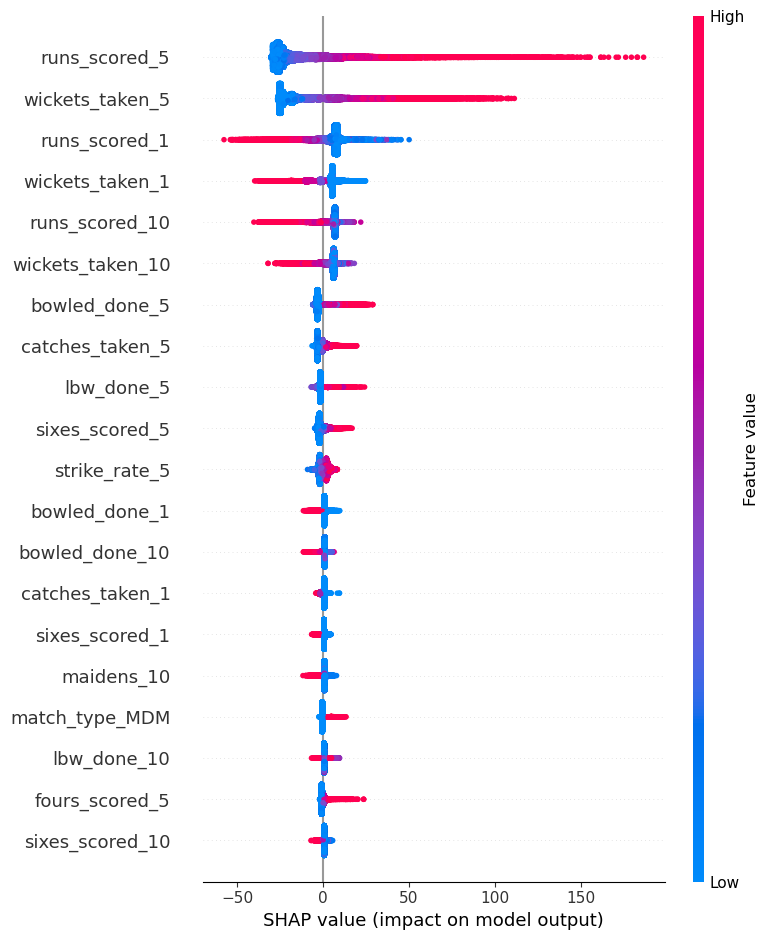

In [153]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [154]:
test_df_features['predicted_fantasy_score_total'] = fantasy_score_total_predicted

/tmp/ipykernel_78328/3441801569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_features['predicted_fantasy_score_total'] = fantasy_score_total_predicted


In [155]:
test_df_features

,player_id,start_date,fantasy_score_total,match_type_MDM,match_type_ODI,match_type_ODM,match_type_T20,match_type_Test,match_id,runs_scored_1,...,maidens_5,maidens_10,strike_rate_1,strike_rate_5,strike_rate_10,economy_rate_1,economy_rate_5,economy_rate_10,order_seen,predicted_fantasy_score_total
373280,7637,2024-07-01,-2,0,0,0,1,0,1428459,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,12.999842
373281,394,2024-07-01,37,0,0,0,1,0,1428459,7.0,...,0.000000e+00,0.000000,58.333333,83.829628,87.471002,124.000000,116.477889,122.810532,0,31.556328
373282,6283,2024-07-01,66,0,0,0,1,0,1428459,25.0,...,1.141829e-03,0.010954,108.695652,133.848979,124.860227,142.857143,117.242389,117.274969,0,50.982075
373283,8563,2024-07-01,17,0,0,0,1,0,1428459,40.0,...,0.000000e+00,0.000000,111.111111,110.739554,106.940300,183.333333,183.333333,183.333333,3,22.771519
373284,6103,2024-07-01,27,0,0,0,1,0,1428459,0.0,...,5.095702e-04,0.008366,66.666667,55.123663,59.516571,176.666667,178.252225,168.213036,0,24.171370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416707,1587,2025-05-20,42,0,0,1,0,0,1462374,38.0,...,0.000000e+00,0.000000,66.666667,62.728633,62.209440,130.000000,129.720810,117.963983,2,18.837242
416708,7111,2025-05-20,96,0,0,1,0,0,1462374,48.0,...,1.144632e-07,0.000252,171.428571,125.187918,122.556961,91.935484,79.423273,87.155890,7,83.235573
416709,10032,2025-05-20,13,0,0,1,0,0,1462374,13.0,...,1.766673e-02,0.083778,118.181818,75.871997,70.529298,130.232558,102.236645,98.665253,8,73.630249
416710,10220,2025-05-20,16,0,0,0,1,0,1473500,10.0,...,0.000000e+00,0.000000,125.000000,86.498817,86.498093,0.000000,0.000000,0.000000,2,20.677254


## Evaluation

In [156]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum' : x['predicted_fantasy_score_total'].nlargest(10).sum()

        })

    ).reset_index()

)

/tmp/ipykernel_78328/2611152996.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [157]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum
0,1385691,1081.0,1113.892578
1,1385692,1722.0,1444.782593
2,1385693,1304.0,1358.910400
3,1385694,1497.0,1225.152954
4,1385695,1585.0,1446.424316
...,...,...,...
1960,1484052,725.0,623.163208
1961,1485778,629.0,448.327576
1962,1486225,799.0,574.898621
1963,1486227,671.0,583.685486


In [158]:
evaluation_df['absolute_percentage_error'] = (
    (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100


In [159]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error
0,1385691,1081.0,1113.892578,3.042792
1,1385692,1722.0,1444.782593,16.098572
2,1385693,1304.0,1358.910400,4.210920
3,1385694,1497.0,1225.152954,18.159455
4,1385695,1585.0,1446.424316,8.742945
...,...,...,...,...
1960,1484052,725.0,623.163208,14.046454
1961,1485778,629.0,448.327576,28.723756
1962,1486225,799.0,574.898621,28.047732
1963,1486227,671.0,583.685486,13.012595


In [160]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error'].mean()

In [161]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}" )

Mean absolute percentage error across all matches : 15.552954743149344


In [162]:
evaluation_df['percentage_error'] = (
        (evaluation_df['predicted_top_11_sum'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
) * 100


In [163]:
mean_percentage_error = evaluation_df['percentage_error'].mean()

In [164]:
print(f"Mean percentage error across all matches : {mean_percentage_error}" )

Mean percentage error across all matches : -9.693962700951166


In [165]:
evaluation_df

,match_id,actual_top_11_sum,predicted_top_11_sum,absolute_percentage_error,percentage_error
0,1385691,1081.0,1113.892578,3.042792,3.042792
1,1385692,1722.0,1444.782593,16.098572,-16.098572
2,1385693,1304.0,1358.910400,4.210920,4.210920
3,1385694,1497.0,1225.152954,18.159455,-18.159455
4,1385695,1585.0,1446.424316,8.742945,-8.742945
...,...,...,...,...,...
1960,1484052,725.0,623.163208,14.046454,-14.046454
1961,1485778,629.0,448.327576,28.723756,-28.723756
1962,1486225,799.0,574.898621,28.047732,-28.047732
1963,1486227,671.0,583.685486,13.012595,-13.012595


## Plotting actual_top_11_sum vs predicted_top_11_sum

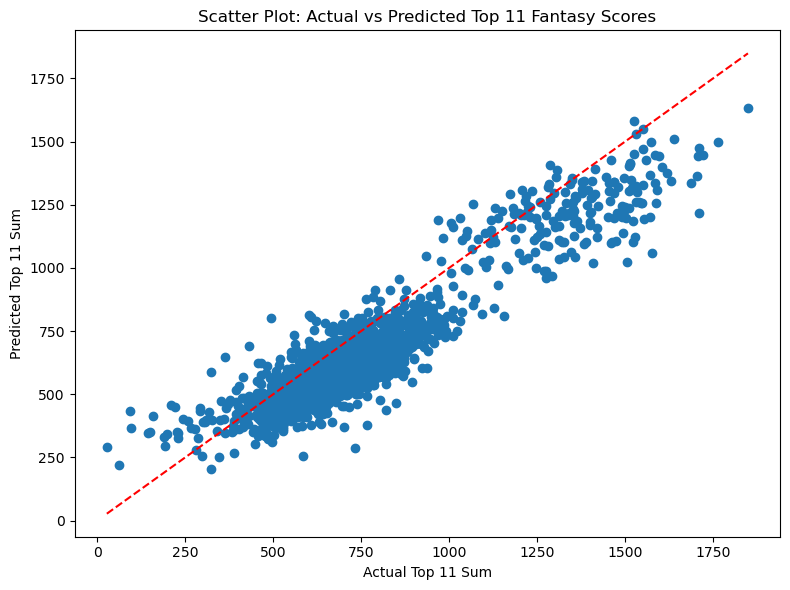

In [166]:
plt.figure(figsize=(8, 6))
plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Scatter Plot: Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()


## Applying PCA for visualization :

In [167]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [168]:
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train_scaled)

In [169]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.18743004 0.12832924]


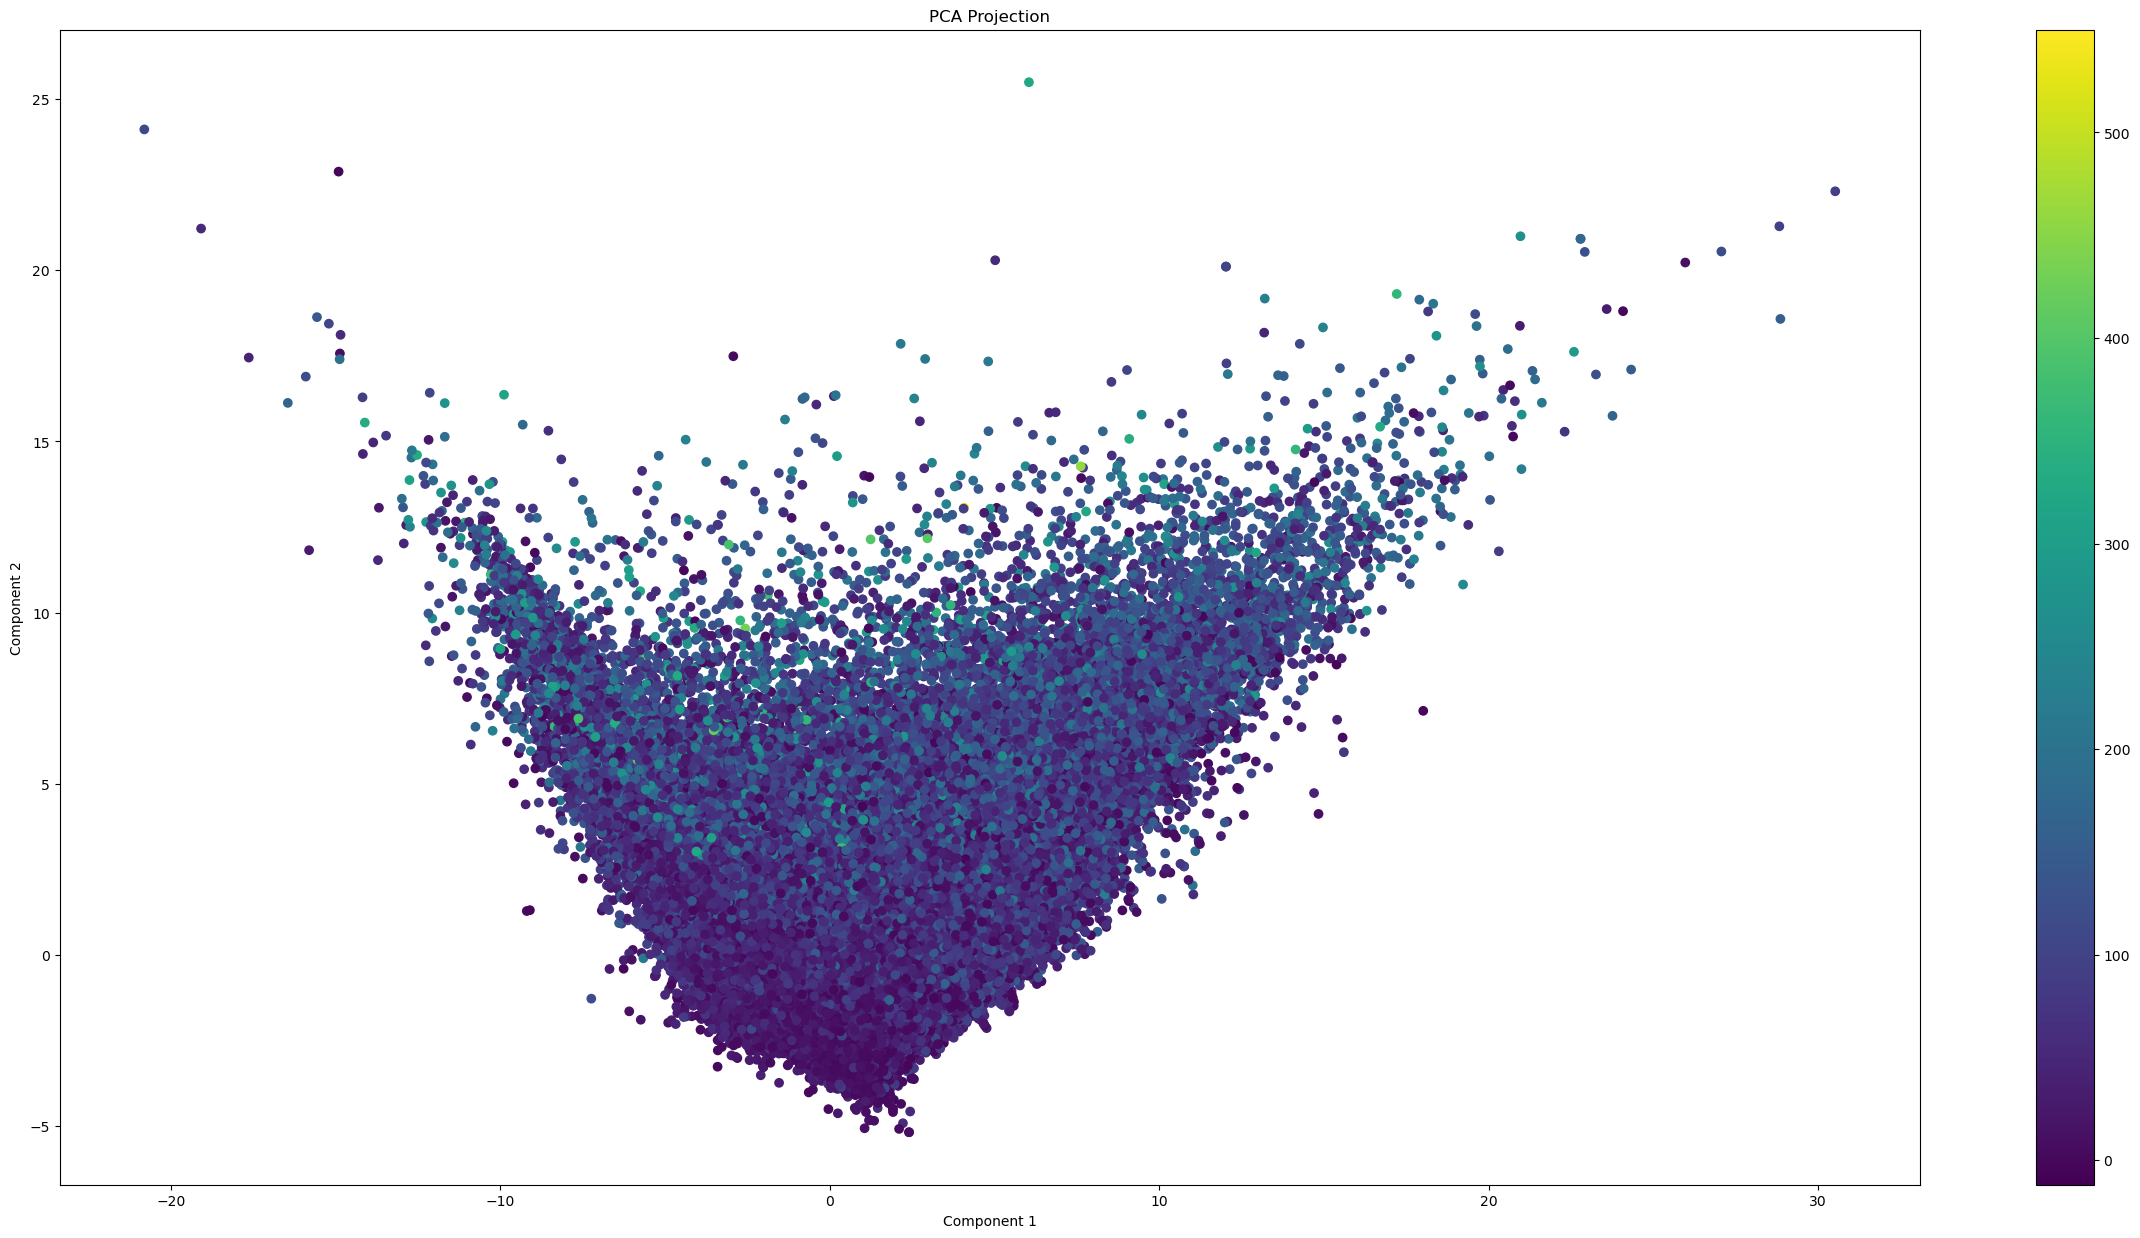

In [170]:
plt.figure(figsize=(30, 15))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c= y_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()


## Applying PCA for Modelling (Experiment 2):

In [171]:
pca = PCA(n_components=0.95)
X_train_transformed = pca.fit_transform(X_train_scaled)

In [172]:
print("Number of components:", pca.n_components_)

Number of components: 23


In [173]:
model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [174]:
model2.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [175]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_transformed = pca.transform(X_test_scaled)
fantasy_score_total_predicted2 = model2.predict(X_test_transformed)

In [176]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted2))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted2))

RMSE: 1041.0081787109375
R² Score: 0.4015308618545532


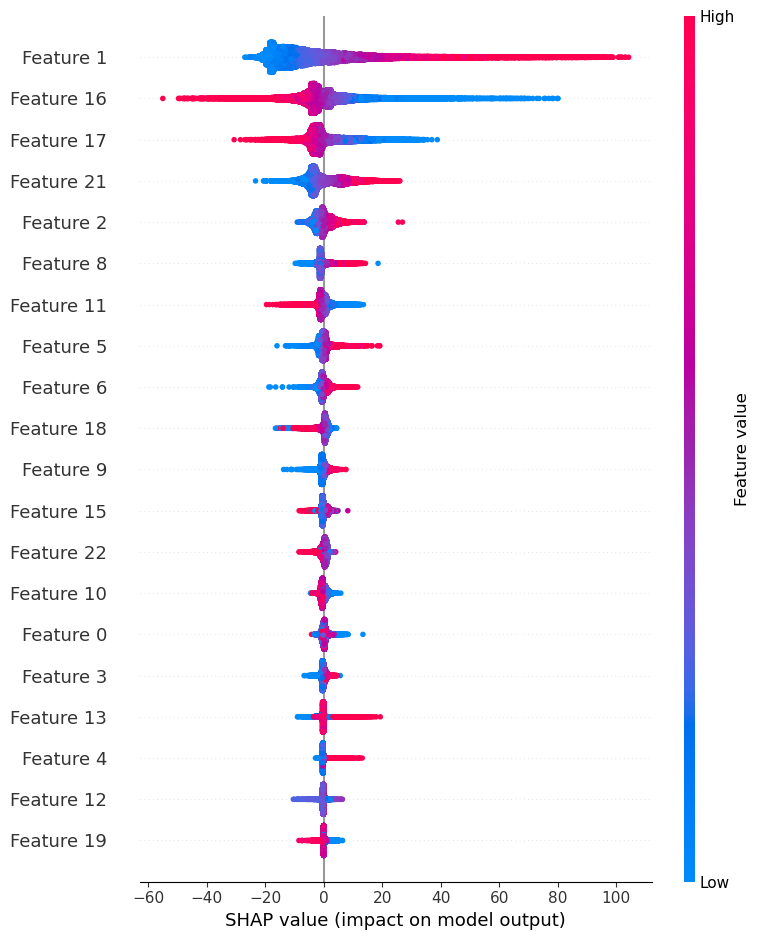

In [177]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed)

In [178]:
test_df_features['predicted_fantasy_score_total_exp2'] = fantasy_score_total_predicted2

/tmp/ipykernel_78328/3130802372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_features['predicted_fantasy_score_total_exp2'] = fantasy_score_total_predicted2


In [179]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp1' : x['predicted_fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp2' : x['predicted_fantasy_score_total_exp2'].nlargest(10).sum()

        })

    ).reset_index()

)

/tmp/ipykernel_78328/1164592780.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [180]:
evaluation_df['absolute_percentage_error_exp2'] = (
    (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100

In [181]:
evaluation_df['percentage_error_exp2'] = (
        (evaluation_df['predicted_top_11_sum_exp2'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
) * 100

In [182]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error_exp2'].mean()

In [183]:
mean_percentage_error = evaluation_df['percentage_error_exp2'].mean()

In [184]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}%" )

Mean absolute percentage error across all matches : 19.37649565886861%


In [185]:
print(f"percentage error across all matches : {mean_percentage_error}%" )

percentage error across all matches : -10.37909904137376%


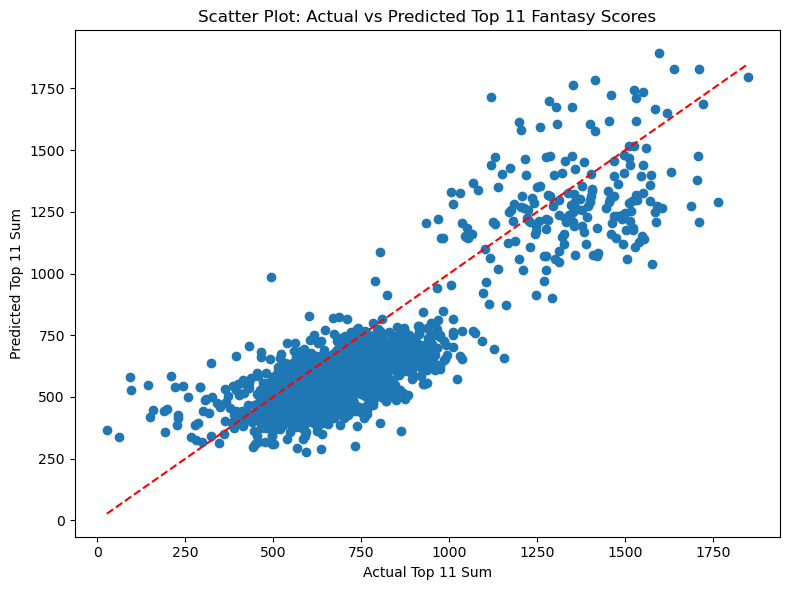

In [186]:
plt.figure(figsize=(8, 6))
plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum_exp2'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Scatter Plot: Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()

## Applying RFECV for feature selection (Experiment 3): 

In [187]:
model3 = XGBRegressor(n_estimators=100, random_state=42)

In [188]:
rfecv = RFECV(estimator=model3, step = 1, cv=5, scoring = 'neg_mean_squared_error', n_jobs = -1)
rfecv.fit(X_train_scaled, y_train)

/home/soumya/anaconda3/envs/win_factor/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/soumya/anaconda3/envs/win_factor/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manyli

RFECV(cv=5,
      estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                             colsample_bylevel=None, colsample_bynode=None,
                             colsample_bytree=None, device=None,
                             early_stopping_rounds=None,
                             enable_categorical=False, eval_metric=None,
                             feature_types=None, feature_weights=None,
                             gamma=None, grow_policy=None, importance_type=None,
                             interaction_constraints=None, learning_rate=None,
                             max_bin=None, max_cat_threshold=None,
                             max_cat_to_onehot=None, max_delta_step=None,
                             max_depth=None, max_leaves=None,
                             min_child_weight=None, missing=nan,
                             monotone_constraints=None, multi_strategy=None,
                             n_estimators=100, n_jobs=None,
                             num_parallel_tree=None, ...),
      n_jobs=-1, scoring='neg_mean_squared_error')

In [189]:

print(f"Number of optimal features: {rfecv.n_features_}")
print("Selected features:", X_train.columns[rfecv.support_].tolist())

Number of optimal features: 40
Selected features: ['match_type_MDM', 'match_type_ODI', 'match_type_ODM', 'match_type_T20', 'match_type_Test', 'runs_scored_1', 'runs_scored_5', 'runs_scored_10', 'fours_scored_1', 'fours_scored_5', 'fours_scored_10', 'sixes_scored_1', 'sixes_scored_5', 'sixes_scored_10', 'catches_taken_1', 'catches_taken_5', 'catches_taken_10', 'run_out_direct_1', 'run_out_direct_5', 'run_out_throw_1', 'run_out_throw_5', 'stumpings_done_1', 'stumpings_done_5', 'stumpings_done_10', 'wickets_taken_1', 'wickets_taken_5', 'wickets_taken_10', 'bowled_done_1', 'bowled_done_5', 'bowled_done_10', 'lbw_done_1', 'lbw_done_5', 'lbw_done_10', 'maidens_5', 'maidens_10', 'strike_rate_5', 'strike_rate_10', 'economy_rate_5', 'economy_rate_10', 'order_seen']


In [190]:
X_train_selected = rfecv.transform(X_train_scaled)
X_test_selected = rfecv.transform(X_test_scaled)

In [191]:
model3.fit(X_train_selected, y_train)
fantasy_score_total_predicted3 = model3.predict(X_test_selected)

In [192]:
print("RMSE:", mean_squared_error(y_test, fantasy_score_total_predicted3))
print("R² Score:", r2_score(y_test, fantasy_score_total_predicted3))

RMSE: 680.4703369140625
R² Score: 0.6088018417358398


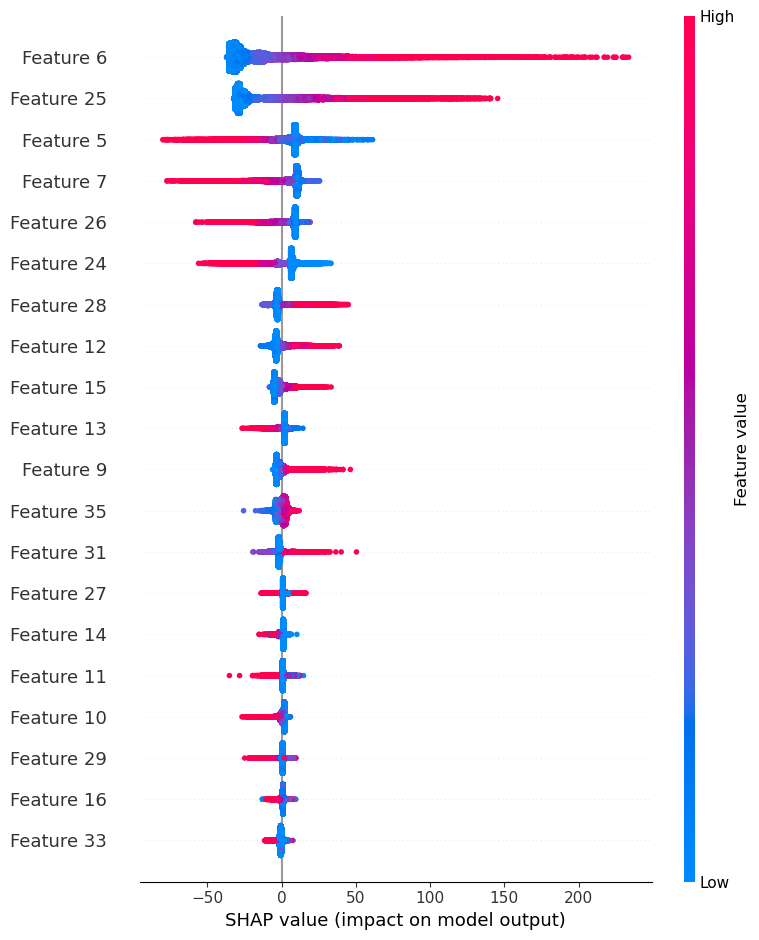

In [193]:
explainer = shap.TreeExplainer(model3)
shap_values = explainer.shap_values(X_test_selected)
shap.summary_plot(shap_values, X_test_selected)

In [194]:
test_df_features['predicted_fantasy_score_total_exp3'] = fantasy_score_total_predicted3

/tmp/ipykernel_78328/3079590622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_features['predicted_fantasy_score_total_exp3'] = fantasy_score_total_predicted3


In [195]:
evaluation_df = (

    test_df_features.groupby('match_id').apply(

        lambda x: pd.Series({

            'actual_top_11_sum' : x['fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp1' : x['predicted_fantasy_score_total'].nlargest(10).sum(),
            'predicted_top_11_sum_exp2' : x['predicted_fantasy_score_total_exp2'].nlargest(10).sum(),
            'predicted_top_11_sum_exp3' : x['predicted_fantasy_score_total_exp3'].nlargest(10).sum()


        })

    ).reset_index()

)

/tmp/ipykernel_78328/2341787377.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df_features.groupby('match_id').apply(


In [196]:
evaluation_df['absolute_percentage_error_exp3'] = (
    (evaluation_df['predicted_top_11_sum_exp3'] - evaluation_df['actual_top_11_sum']).abs() /
    evaluation_df['actual_top_11_sum']
) * 100

In [197]:
evaluation_df['percentage_error_exp3'] = (
        (evaluation_df['predicted_top_11_sum_exp3'] - evaluation_df['actual_top_11_sum']) /
    evaluation_df['actual_top_11_sum']
)*100

In [198]:
mean_absolute_percentage_error = evaluation_df['absolute_percentage_error_exp3'].mean()

In [199]:
mean_percentage_error = evaluation_df['percentage_error_exp3'].mean()

In [200]:
print(f"Mean absolute percentage error across all matches : {mean_absolute_percentage_error}%" )

Mean absolute percentage error across all matches : 12.327389696542188%


In [201]:
print(f"percentage error across all matches : {mean_percentage_error}%" )

percentage error across all matches : 2.304764277514903%


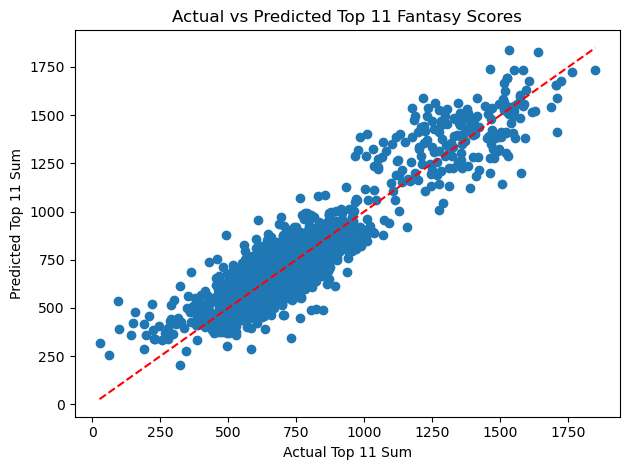

Exception ignored in: <function ResourceTracker.__del__ at 0x7aa624f81080>
Traceback (most recent call last):
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x782560781080>
Traceback (most recent call last):
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/home/soumya/anaconda3/envs/win_factor/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
Chi

In [202]:

plt.scatter(
    evaluation_df['actual_top_11_sum'],
    evaluation_df['predicted_top_11_sum_exp3'],
)
plt.plot([evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         [evaluation_df['actual_top_11_sum'].min(), evaluation_df['actual_top_11_sum'].max()],
         color='red', linestyle='--')

plt.xlabel('Actual Top 11 Sum')
plt.ylabel('Predicted Top 11 Sum')
plt.title('Actual vs Predicted Top 11 Fantasy Scores')

plt.tight_layout()
plt.show()